In [222]:
import pandas as pd

# Let's load the demand data from the provided excel file to see what it looks like.
demand_data_path = 'Demand_Data.xlsx'
demand_data = pd.read_excel(demand_data_path)

demand_data.head(50)


,Period,Dataset3
0,1,9.4862
1,2,13.1013
2,3,17.8305
3,4,21.1476
4,5,23.6652
5,6,27.7941
6,7,30.9328
7,8,29.2388
8,9,27.6726
9,10,30.0734


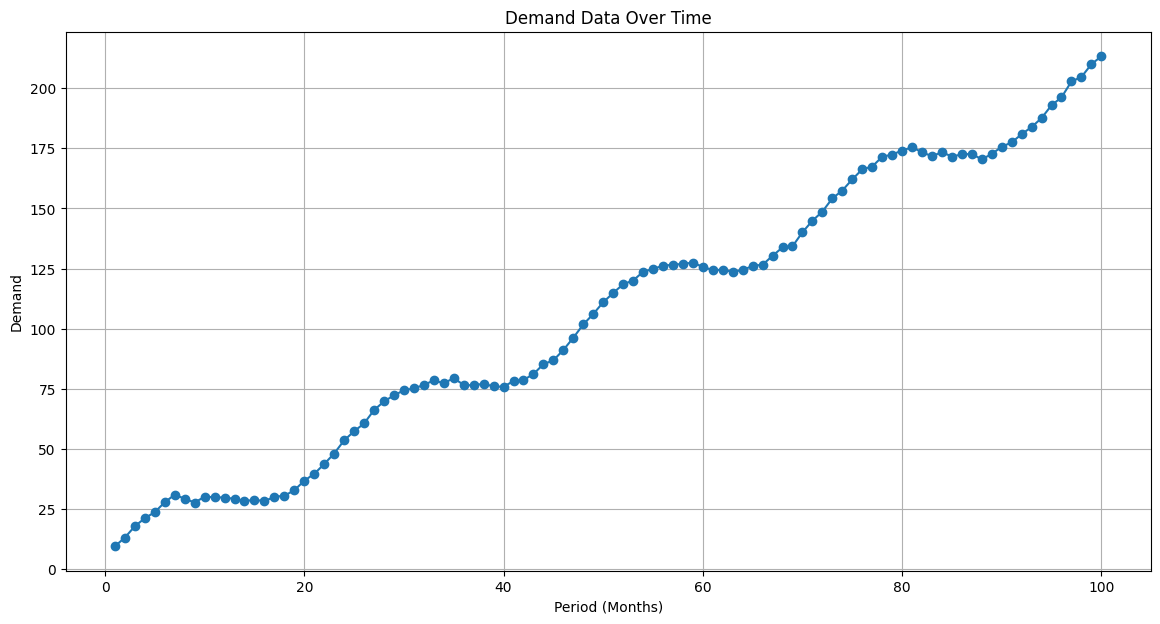

In [223]:
import matplotlib.pyplot as plt

# Plotting the demand data
plt.figure(figsize=(14,7))
plt.plot(demand_data['Period'], demand_data['Dataset3'], marker='o')
plt.title('Demand Data Over Time')
plt.xlabel('Period (Months)')
plt.ylabel('Demand')
plt.grid(True)
plt.show()


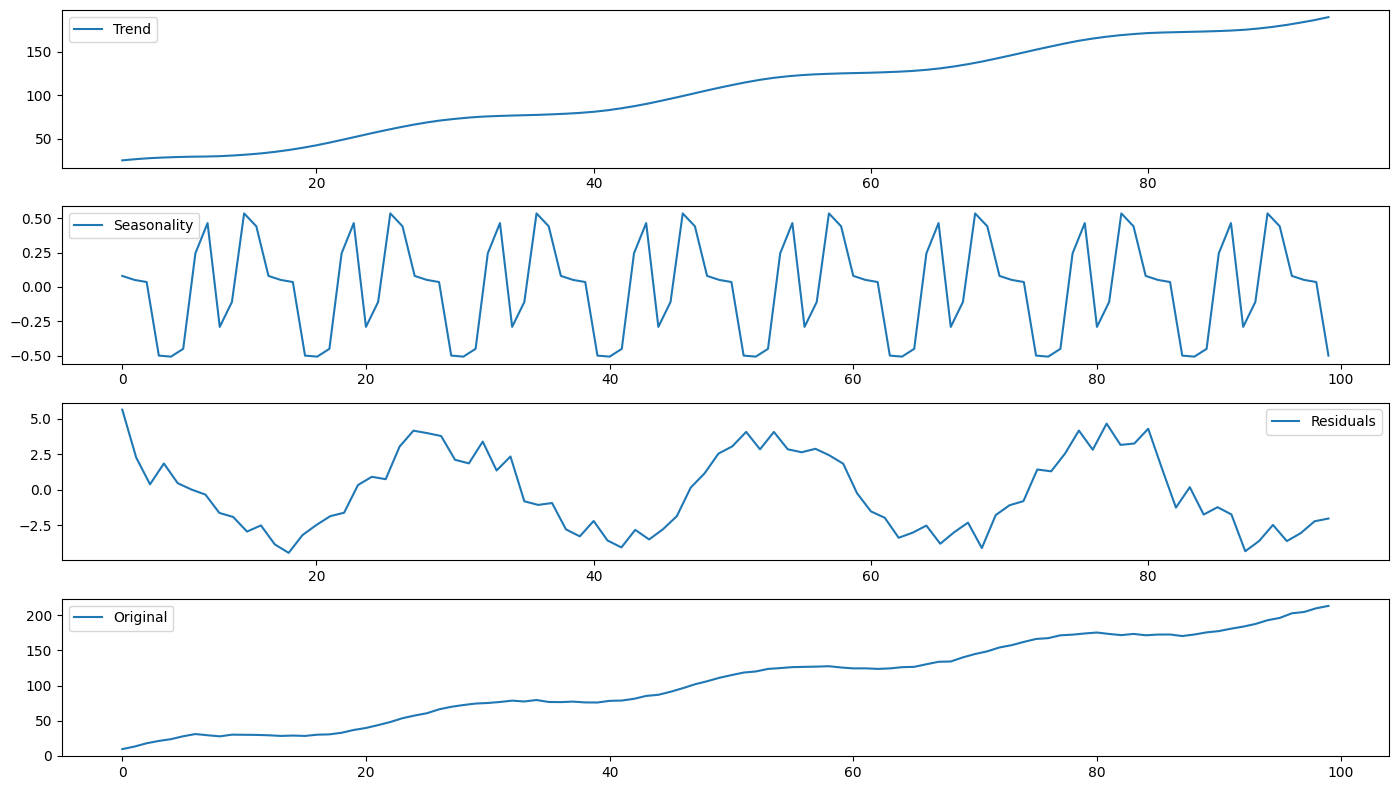

In [224]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data to identify trend, seasonality, and residuals.
decomposition = seasonal_decompose(demand_data['Dataset3'], model='additive', period=12)

# Plotting the decomposed time series components
plt.figure(figsize=(14, 8))

# Trend
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonal
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residual
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Original
plt.subplot(414)
plt.plot(demand_data['Dataset3'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [225]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Configure the Holt-Winters model to account for both trend and seasonality
# The seasonal_periods is set to 12, assuming monthly data with yearly seasonality
model = ExponentialSmoothing(demand_data['Dataset3'], trend='add', seasonal='add', seasonal_periods=12)

# Fit the model
fitted_model = model.fit()

# Forecast the next 48 months
forecasted_demand = fitted_model.forecast(48)

# Display the forecasted demand
forecasted_demand.index = range(101, 149)  # Setting the period index starting from 101 to 148 for the forecasted demand


# Convert the forecasted demand into a dataframe for better readability and export
forecasted_demand_df = forecasted_demand.reset_index()
forecasted_demand_df.columns = ['Month', 'Predicted Demand']
forecasted_demand_df
print(forecasted_demand_df)


    Month  Predicted Demand
0     101        217.382821
1     102        221.677325
2     103        225.735447
3     104        229.975943
4     105        233.235599
5     106        237.436353
6     107        242.008651
7     108        245.902461
8     109        249.969563
9     110        253.720984
10    111        258.032428
11    112        261.596618
12    113        265.592569
13    114        269.887073
14    115        273.945195
15    116        278.185692
16    117        281.445348
17    118        285.646101
18    119        290.218399
19    120        294.112210
20    121        298.179312
21    122        301.930732
22    123        306.242177
23    124        309.806366
24    125        313.802317
25    126        318.096822
26    127        322.154943
27    128        326.395440
28    129        329.655096
29    130        333.855850
30    131        338.428148
31    132        342.321958
32    133        346.389060
33    134        350.140481
34    135        354

end of question 1

In [226]:
# Given values
ordering_cost_per_order = 100  # S
cost_per_item = 2  # Cost of each item to the company
annual_interest_rate = 0.10  # Yearly interest rate
holding_cost_per_unit_per_year = annual_interest_rate * cost_per_item  # H

# Calculate the annual demand (D) by summing the forecasted demand for the next 48 months
annual_demand = forecasted_demand.sum() * (12 / 48)  # D

# Calculate EOQ
EOQ = ((2 * annual_demand * ordering_cost_per_order) / holding_cost_per_unit_per_year) ** 0.5

EOQ


1935.058051825278

In [227]:
from scipy.stats import norm

# Given values
lead_time = 3  # months
service_level = 0.95  # Target service level for Type 2 service level
z_score = norm.ppf(service_level)  # Z-score for the desired service level

# Calculate the average monthly demand and standard deviation
average_monthly_demand = forecasted_demand.mean()
std_dev_demand = average_monthly_demand * 0.10  # 10% of the mean demand

# Calculate Reorder Point (R)
R = average_monthly_demand * lead_time + z_score * std_dev_demand * (lead_time ** 0.5)

R


1025.0109572927613

end of question 2

In [228]:
# Assuming some reasonable values for retail price and salvage value
retail_price_per_unit = 5  # p, assumed retail price
salvage_value_per_unit = 1  # s, assumed salvage value

# Calculate the Critical Ratio (CR)
CR = (retail_price_per_unit - cost_per_item) / (retail_price_per_unit - salvage_value_per_unit)

# Find the z-score for the Critical Ratio (OSL)
OSL = norm.ppf(CR)

# Calculate the optimal inventory level (Q*)
optimal_inventory_level = OSL * std_dev_demand + average_monthly_demand

print("optimal_inventory_level = ", optimal_inventory_level)
print("OSL = ", OSL)
print("CR = ", CR)


optimal_inventory_level =  333.08407964822453
OSL =  0.6744897501960817
CR =  0.75


In [229]:
# Recalculate costs for the Level Strategy with the correct approach
# We'll assume that if the inventory level is negative (which indicates backorders), there will be a backorder cost.
# For simplicity, let's assume the backorder cost is the same as the holding cost, which is $0.20 per unit per year.

initial_monthly_production = 0
production_per_worker_per_day = 0.1
working_days_per_month = 20
hiring_cost = 250
firing_cost = 600
initial_workers = 20

# Update the Level Strategy DataFrame with the correct approach
level_strategy_df = forecasted_demand_df.copy()
level_strategy_df['Production'] = initial_monthly_production
level_strategy_df['Inventory Level'] = 0
level_strategy_df['Cumulative Production'] = level_strategy_df['Production'].cumsum()
level_strategy_df['Cumulative Demand'] = level_strategy_df['Predicted Demand'].cumsum()
level_strategy_df['Inventory Level'] = level_strategy_df['Cumulative Production'] - level_strategy_df['Cumulative Demand']
level_strategy_df['Inventory Holding Cost'] = level_strategy_df['Inventory Level'].apply(lambda x: max(x, 0)) * (holding_cost_per_unit_per_year)
level_strategy_df['Backorder Cost'] = level_strategy_df['Inventory Level'].apply(lambda x: abs(min(x, 0))) * (holding_cost_per_unit_per_year)

# Calculate total costs for the Level Strategy
total_holding_cost_level = level_strategy_df['Inventory Holding Cost'].sum()
total_backorder_cost_level = level_strategy_df['Backorder Cost'].sum()

total_cost_level_strategy = total_holding_cost_level + total_backorder_cost_level

# Recalculate costs for the Chase Strategy
# Reset the DataFrame for Chase Strategy calculations
chase_strategy_df = forecasted_demand_df.copy()
chase_strategy_df['Workers Required'] = chase_strategy_df['Predicted Demand'] / (production_per_worker_per_day * working_days_per_month)
chase_strategy_df['Workers Hired'] = 0
chase_strategy_df['Workers Fired'] = 0
chase_strategy_df['Inventory Level'] = 0  # In Chase strategy, the goal is to have zero inventory

# Calculate the number of workers to hire/fire to meet the demand exactly
workers = initial_workers
for index, row in chase_strategy_df.iterrows():
    workers_required = round(row['Workers Required'])
    if workers < workers_required:
        workers_hired = workers_required - workers
        workers = workers_required
        chase_strategy_df.at[index, 'Workers Hired'] = workers_hired
    elif workers > workers_required:
        workers_fired = workers - workers_required
        workers = workers_required
        chase_strategy_df.at[index, 'Workers Fired'] = workers_fired

# Calculate hiring and firing costs for each month
chase_strategy_df['Hiring Costs'] = chase_strategy_df['Workers Hired'] * hiring_cost
chase_strategy_df['Firing Costs'] = chase_strategy_df['Workers Fired'] * firing_cost

# Sum the costs to get the total cost for the Chase strategy
total_hiring_cost_chase = chase_strategy_df['Hiring Costs'].sum()
total_firing_cost_chase = chase_strategy_df['Firing Costs'].sum()

total_cost_chase_strategy = total_hiring_cost_chase + total_firing_cost_chase

print("total_cost_level_strategy = ", int(total_cost_level_strategy), "$")
print("total_cost_chase_strategy = ", total_cost_chase_strategy, "$")

total_cost_level_strategy =  65988 $
total_cost_chase_strategy =  45750 $


end of question 3

In [234]:
# Question 4: Master Production Schedule (MPS) for Level and Chase Strategies

# Constants from previous calculations
initial_workers = 20  # Starting workforce
production_per_worker_per_day = 0.1  # Units produced by one worker per day
working_days_per_month = 20  # Number of working days in a month

# Calculate monthly production for the Level Strategy (constant workforce)
monthly_production_level = initial_workers * production_per_worker_per_day * working_days_per_month

# Master Production Schedule (MPS) for Level Strategy
mps_level = forecasted_demand.reset_index()
mps_level.columns = ['Month', 'Demand']
mps_level['Production'] = monthly_production_level

# Master Production Schedule (MPS) for Chase Strategy
# Adjusting workforce to match the demand exactly each month
mps_chase = forecasted_demand.reset_index()
mps_chase.columns = ['Month', 'Demand']
mps_chase['Workers Required'] = mps_chase['Demand'] / (production_per_worker_per_day * working_days_per_month)
mps_chase['Production'] = mps_chase['Workers Required'] * production_per_worker_per_day * working_days_per_month


print("the total MPS for the level strategy and chase strategy")
mps_level.head(10), mps_chase.head(10)  # Display the first few rows of each MPS


the total MPS for the level strategy and chase strategy


(   Month      Demand  Production
 0    101  217.382821        40.0
 1    102  221.677325        40.0
 2    103  225.735447        40.0
 3    104  229.975943        40.0
 4    105  233.235599        40.0
 5    106  237.436353        40.0
 6    107  242.008651        40.0
 7    108  245.902461        40.0
 8    109  249.969563        40.0
 9    110  253.720984        40.0,
    Month      Demand  Workers Required  Production
 0    101  217.382821        108.691410  217.382821
 1    102  221.677325        110.838662  221.677325
 2    103  225.735447        112.867723  225.735447
 3    104  229.975943        114.987972  229.975943
 4    105  233.235599        116.617800  233.235599
 5    106  237.436353        118.718177  237.436353
 6    107  242.008651        121.004325  242.008651
 7    108  245.902461        122.951231  245.902461
 8    109  249.969563        124.984782  249.969563
 9    110  253.720984        126.860492  253.720984)

end of question 4

In [236]:
# Adjusting the MRP calculation to handle missing months

# Initialize dataframes for MRP calculations for each month
mrp_level_all_months = pd.DataFrame()
mrp_chase_all_months = pd.DataFrame()

# Iterate through each month in the forecasted demand
for month in range(101, 148):
    # Check if the month exists in the MPS dataframes and get the production for each strategy
    if month in mps_level['Month'].values:
        production_level = mps_level.loc[mps_level['Month'] == month, 'Production'].values[0]
    else:
        production_level = 0  # Default to 0 if the month is not in the dataframe

    if month in mps_chase['Month'].values:
        production_chase = mps_chase.loc[mps_chase['Month'] == month, 'Production'].values[0]
    else:
        production_chase = 0  # Default to 0 if the month is not in the dataframe

    # MRP for Level Strategy
    mrp_level = bom.copy()
    mrp_level['Gross Requirements'] = mrp_level['Required'] * production_level
    mrp_level['Month'] = month

    # MRP for Chase Strategy
    mrp_chase = bom.copy()
    mrp_chase['Gross Requirements'] = mrp_chase['Required'] * production_chase
    mrp_chase['Month'] = month


    # Append to the all months dataframe

    mrp_level_all_months = mrp_level_all_months.append(mrp_level)

# Displaying the MRP for the first few rows as a sample
mrp_level_all_months.head(18)


<ipython-input-236-6bd2b1f0d40a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_level_all_months = mrp_level_all_months.append(mrp_level)
<ipython-input-236-6bd2b1f0d40a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_level_all_months = mrp_level_all_months.append(mrp_level)
<ipython-input-236-6bd2b1f0d40a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_level_all_months = mrp_level_all_months.append(mrp_level)
<ipython-input-236-6bd2b1f0d40a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_level_all_months = mrp_level_all_months.append(mrp_level)
<ipython-input-236-6bd2b1f0d40a>:33: FutureWarning: The frame.ap

,Part Number,Part Name,Required,Material,Lead Time,Gross Requirements,Month
0,1,Base,1,Cast Iron,1,40.0,101
1,2,Fork,1,Cast Iron,1,40.0,101
2,3,Post,1,1020 Steel,1,40.0,101
3,4,Sleeve,1,1020 Steel,1,40.0,101
4,5,Bushing,2,Brass,1,80.0,101
5,6,Conical Set Screw,2,Steel,1,80.0,101
6,7,M10x1.5 Hex Nut,2,Steel,1,80.0,101
7,8,M9x1.25 Set Screw,1,Steel,1,40.0,101
8,9,M7x1 Set Screw,1,Steel,1,40.0,101
0,1,Base,1,Cast Iron,1,40.0,102


In [235]:
# Adjusting the MRP calculation to handle missing months

# Initialize dataframes for MRP calculations for each month
mrp_level_all_months = pd.DataFrame()
mrp_chase_all_months = pd.DataFrame()

# Iterate through each month in the forecasted demand
for month in range(101, 148):
    # Check if the month exists in the MPS dataframes and get the production for each strategy
    if month in mps_level['Month'].values:
        production_level = mps_level.loc[mps_level['Month'] == month, 'Production'].values[0]
    else:
        production_level = 0  # Default to 0 if the month is not in the dataframe

    if month in mps_chase['Month'].values:
        production_chase = mps_chase.loc[mps_chase['Month'] == month, 'Production'].values[0]
    else:
        production_chase = 0  # Default to 0 if the month is not in the dataframe

    # MRP for Level Strategy
    mrp_level = bom.copy()
    mrp_level['Gross Requirements'] = mrp_level['Required'] * production_level
    mrp_level['Month'] = month

    # MRP for Chase Strategy
    mrp_chase = bom.copy()
    mrp_chase['Gross Requirements'] = mrp_chase['Required'] * production_chase
    mrp_chase['Month'] = month


    # Append to the all months dataframe

    mrp_chase_all_months = mrp_chase_all_months.append(mrp_chase)

# Displaying the MRP for the first few rows as a sample
mrp_chase_all_months.head(18)


<ipython-input-235-ab393502e237>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_chase_all_months = mrp_chase_all_months.append(mrp_chase)
<ipython-input-235-ab393502e237>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_chase_all_months = mrp_chase_all_months.append(mrp_chase)
<ipython-input-235-ab393502e237>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_chase_all_months = mrp_chase_all_months.append(mrp_chase)
<ipython-input-235-ab393502e237>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mrp_chase_all_months = mrp_chase_all_months.append(mrp_chase)
<ipython-input-235-ab393502e237>:33: FutureWarning: The frame.ap

,Part Number,Part Name,Required,Material,Lead Time,Gross Requirements,Month
0,1,Base,1,Cast Iron,1,217.382821,101
1,2,Fork,1,Cast Iron,1,217.382821,101
2,3,Post,1,1020 Steel,1,217.382821,101
3,4,Sleeve,1,1020 Steel,1,217.382821,101
4,5,Bushing,2,Brass,1,434.765642,101
5,6,Conical Set Screw,2,Steel,1,434.765642,101
6,7,M10x1.5 Hex Nut,2,Steel,1,434.765642,101
7,8,M9x1.25 Set Screw,1,Steel,1,217.382821,101
8,9,M7x1 Set Screw,1,Steel,1,217.382821,101
0,1,Base,1,Cast Iron,1,221.677325,102


end of question 5